# 로지스틱 회귀 연구과제 

> https|//www.kaggle.com/datasets/blastchar/telco-customer-churn

로지스틱 회귀를 활용하면 고객 유지를 위한 행동을 예측합니다. 관련된 모든 고객 데이터를 분석하고 집중적인 고객 유지 프로그램을 개발할 수 있다.

다음의 데이터의 각 행은 고객을 나타내고, 각 열에는 메타데이터 열에 설명된 고객 속성이 포함되어 있으며 데이터셋에는 다음과 같은 정보들이 포함되어 있따.

- 지난 달에 떠난 고객 - 해당 열은 Churn이라고 함(종속변수)
- 각 고객이 등록한 서비스 – 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 - 보호, 기술 지원, TV 및 영화 스트리밍
- 고객 계정 정보 - 고객 유지 기간, 계약, 결제 방법, 전자 청구서, 월별 요금, 총 요금
- 고객에 대한 인구통계 정보 – 성별, 연령대, 파트너 및 부양가족 유무

상세 메타 데이터는 아래와 같습니다.

| 변수명 | 설명 | 비고 |
|---|---|---|
| customerID | 소비자의 식별자 | |
| gender | 성별 | |
| SeniorCitizen | 노인인지의 여부 | |
| Partner | 배우자의 유무 | |
| Dependents | 자녀의 유무 | |
| tenure | 고객의 가입 기간 | | 개월 수 |
| PhoneService | 휴대폰 서비스를 가입 했는지의 여부 | |
| MultipleLines | 여러 개의 통신선을 서비스 받고 있는지의 여부 | Yes, No, No phone service / 휴대폰 서비스를 가입한 고객만 해당됨. |
| InternetService | 인터넷 서비스 제공자 | DSL, Fiber optic, No |
| OnlineSecurity | 온라인 보안 서비스를 가입 했는지의 여부 | Yes, No, No internet service / 인터넷 서비스를 가입한 고객만 해당됨. |
| OnlineBackup | 온라인 백업 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| TechSupport | 기술 서포트 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingTV | TV 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingMovies | 영화 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| Contract | 계약 유형 | Month-to-month, One year, Two year |
| PaperlessBilling | 전자 고지서 여부 | |
| PaymentMethod | 요금 지불 방법 | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic) |
| MonthlyCharges | 매달 고객에게 청구되는 금액 | |
| TotalCharges | 고객에게 청구된 총 금액 | |
| Churn | 지난 한 달 내에 떠난 고객인지의 여부 | |

In [317]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [318]:
origin = my_read_data('https://data.hossam.kr/mldata/telecom_customer.xlsx',categories=['Churn'])
df = origin.copy()
# 기준점 : 정확도 78%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [319]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [320]:
column_name = list(df.columns)
# df['alone'] = 'No'
# alone_check = set()
# check = set()
# for i,v in enumerate(df['Partner']):
#     if v == 'No': check.add(i)
# for i,v in enumerate(df['Dependents']):
#     if v == 'No': 
#         if i in check:alone_check.add(i)
# for i,v in enumerate(df['alone']):
#     if i in alone_check: df['alone'][i] = 'Yes'
# df['alone'].value_counts()

In [321]:
for i in ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    df[i] = df[i].apply(lambda x : str(x).split()[0])

In [322]:
df["InternetService"] = df["InternetService"].map({"Fiber optic": 1, "DSL":1,'No':0})
df["PaymentMethod"] = df["PaymentMethod"].map({"Credit card (automatic)":1,'Bank transfer (automatic)':1,'Electronic check':0,'Mailed check':0})
df['Contract'] = df['Contract'].map({"Month-to-month":0,'One year':1,"Two year":1})


In [323]:
origin['OnlineSecurity']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7043, dtype: object

In [324]:
# df['ExtraService'] = 'No'
# service_check = set()
# for i,v in enumerate(origin['OnlineSecurity']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(origin['OnlineBackup']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(origin['DeviceProtection']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(origin['TechSupport']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(origin['StreamingTV']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(origin['StreamingMovies']):
#     if v == 'Yes' : service_check.add(i)
# for i,v in enumerate(df['ExtraService']):
#     if i in service_check:
#         df['ExtraService'][i] = 'Yes'
# df['ExtraService']
df['tenure'] = (df['tenure'] < 10).astype('int')
df['tenure']

0       1
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: tenure, Length: 7043, dtype: int32

In [325]:
TotalCharges = list(df['TotalCharges'])
null_charges = []
for i,v in enumerate(df['TotalCharges']):
    if v ==' ' : null_charges.append(i)
for i in null_charges:
    TotalCharges[i] = df['Contract'][i]*df['MonthlyCharges'][i]
df['TotalCharges'] = TotalCharges

In [326]:
for i in column_name:
    print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
0    5189
1    1854
Name: tenure, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
1    5517
0    1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: 

In [329]:
df2 = my_labelling(df,'PaperlessBilling','Churn','gender','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','Partner','Dependents','TotalCharges')

df2.dtypes


customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int32
PhoneService          int32
MultipleLines         int32
InternetService       int64
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int64
PaperlessBilling      int32
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [330]:
df3 = my_standard_scaler(df2.drop(["customerID"],axis=1), 'Churn')
df3.dtypes



gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [343]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, 'Churn', test_size=0.35, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((4577, 19), (2466, 19), (4577,), (2466,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.802056 |
| 13 |    10 | l2        |          0.801181 |
| 16 |   100 | l2        |          0.800962 |
| 10 |     1 | l2        |          0.800526 |
|  4 |  0.01 | l2        |          0.799217 |
|  1 | 0.001 | l2        |          0.776927 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.291673 |     0.265141 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.803802 |     0.809002 | 예측 결과(TN,FP,TP,TN)가 실제 결과

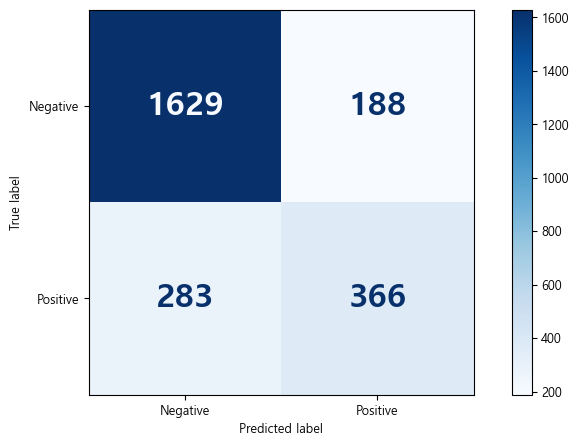


[ROC/PR Curve]


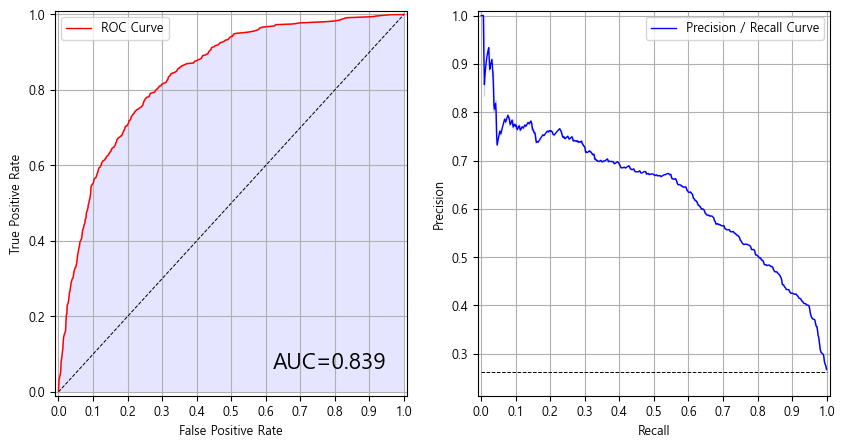


[학습곡선]


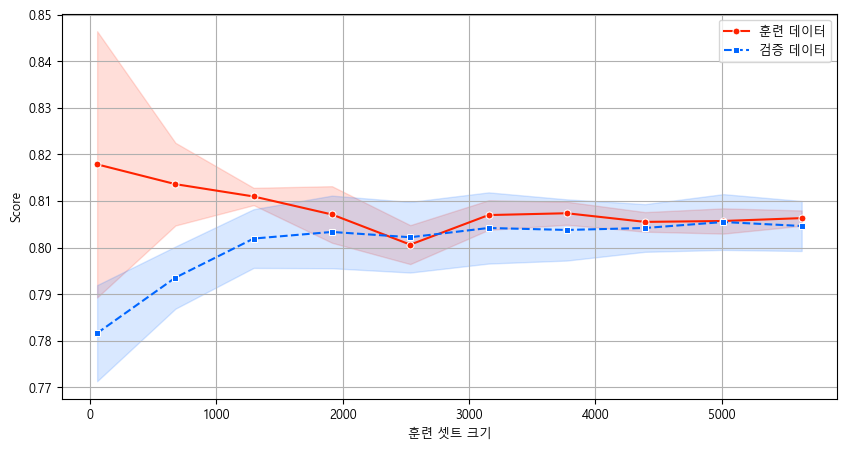

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 17 | Churn      | MonthlyCharges   |             1.1461 |      0.194 |   5.902 |          0 | 12.7536 |     3.1458 |
| 18 | Churn      | TotalCharges     |            -0.7787 |      0.144 | -5.4071 |          0 | 7.41996 |      0.459 |
|  7 | Churn      | InternetService  |             0.0934 |      0.132 |  0.7099 |      0.478 | 5.22178 |     1.0979 |
|  4 | Churn      | tenure           |             0.1463 |      0.089 |  1.6383 |      0.101 | 2.97194 |     1.1575 |
|  5 | Churn      | PhoneService     |            -0.2884 |      0.086 | -3.3652 |      0.001 | 2.35098 |     0.7494 |
| 12 | Churn      | StreamingTV      |             0.0449 |      0.075

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [344]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  4 |  0.01 | l2        |          0.795505 |
|  7 |   0.1 | l2        |          0.793757 |
| 10 |     1 | l2        |          0.793101 |
| 13 |    10 | l2        |          0.793101 |
| 16 |   100 | l2        |          0.792883 |
|  1 | 0.001 | l2        |          0.771683 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.268823 |     0.246547 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.796373 |     0.789538 | 예측 결과(TN,FP,TP,TN)가 실제 결과

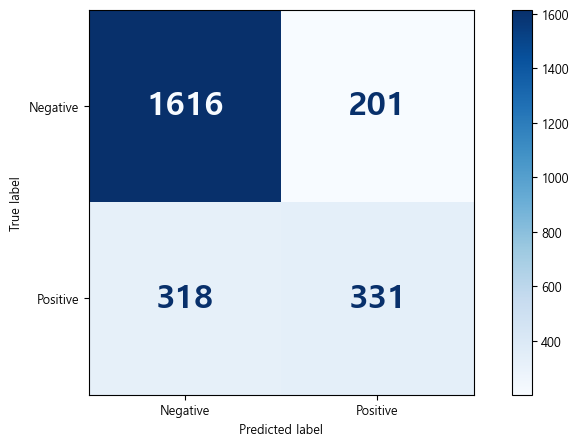


[ROC/PR Curve]


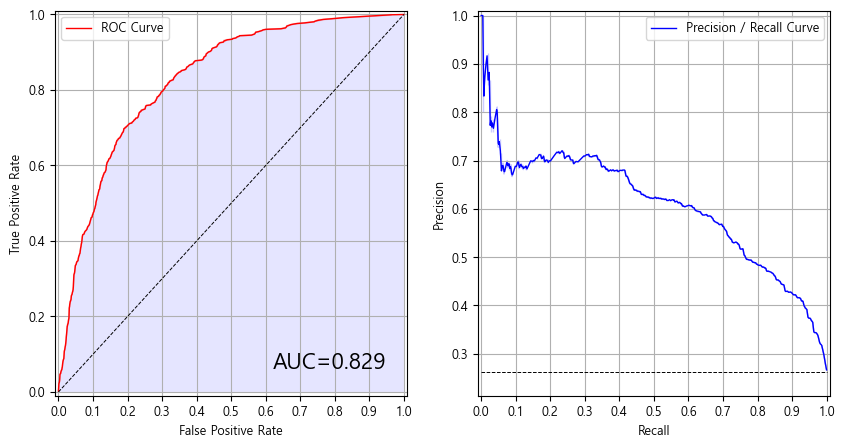


[학습곡선]


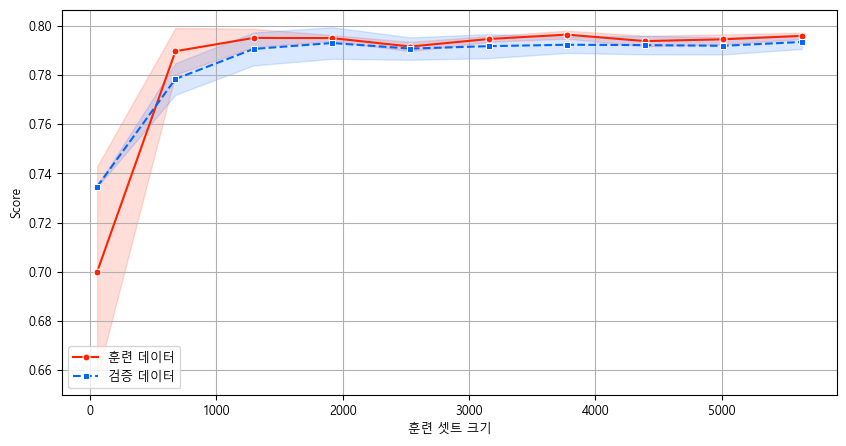

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 17 | Churn      | TotalCharges     |            -0.3414 |      0.132 | -2.5818 |       0.01 | 6.74657 |     0.7108 |
|  4 | Churn      | tenure           |             0.2819 |      0.085 |  3.3024 |      0.001 | 2.88159 |     1.3257 |
|  7 | Churn      | InternetService  |             0.5066 |      0.084 |  6.0628 |          0 | 2.41796 |     1.6596 |
| 14 | Churn      | Contract         |            -0.5648 |      0.081 | -6.9802 |          0 | 2.02896 |     0.5685 |
| 13 | Churn      | StreamingMovies  |             0.2283 |      0.066 |  3.4636 |      0.001 | 1.72704 |     1.2565 |
| 12 | Churn      | StreamingTV      |             0.1983 |      0.064

LogisticRegression(C=0.01, max_iter=500, n_jobs=-1)

In [345]:
ignore = ['MonthlyCharges',]
x_tr = x_train.drop(ignore, axis=1)
x_te = x_test.drop(ignore, axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

In [ ]:
# 'not majority', 'all', 'minority', 'auto', 'not minority'
smote_sampler = SMOTE(sampling_strategy="auto", k_neighbors=3, random_state=777)
x_sm, y_sm = smote_sampler.fit_resample(x_tr, y_train)
y_sm.value_counts()

0    3912
1    3912
Name: Churn, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  4 |  0.01 | l2        |          0.801384 |
|  7 |   0.1 | l2        |          0.799341 |
| 10 |     1 | l2        |          0.797808 |
| 16 |   100 | l2        |          0.796657 |
| 13 |    10 | l2        |          0.796529 |
|  1 | 0.001 | l2        |          0.757413 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.384545 |      0.16809 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.812756 |     0.751846 | 예측 결과(TN,FP,TP,TN)가 실제 결과

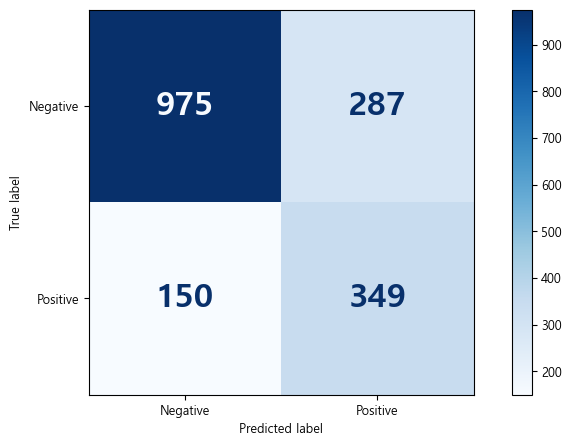


[ROC/PR Curve]


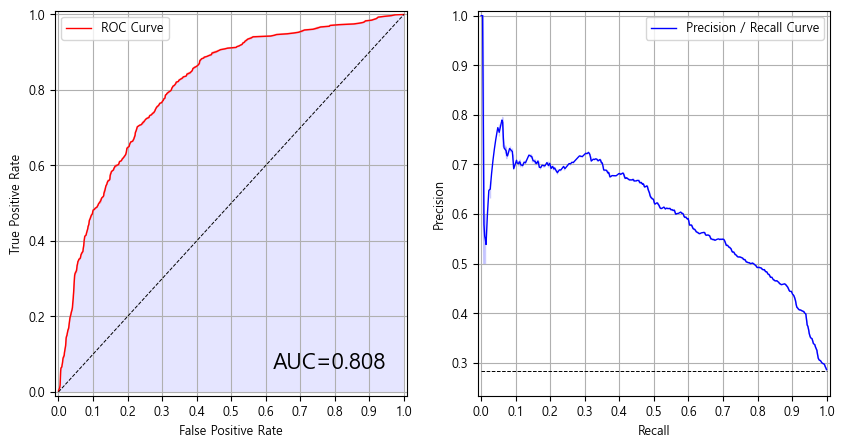


[학습곡선]


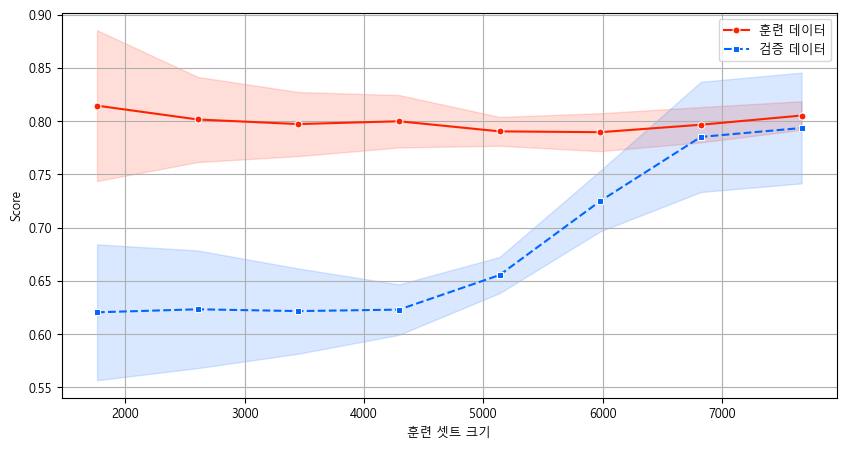

LogisticRegression(C=0.01, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_sm, y_sm, x_te, y_test, report=False)